In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Mall_Customers.csv')
df = df.rename(columns={'Genre':'Gender'})

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
from sklearn.preprocessing import StandardScaler
cl = df[['Annual Income (k$)','Spending Score (1-100)']]

ss = StandardScaler()
cls = ss.fit_transform(cl)
cls = pd.DataFrame(cls, columns=cl.columns)

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

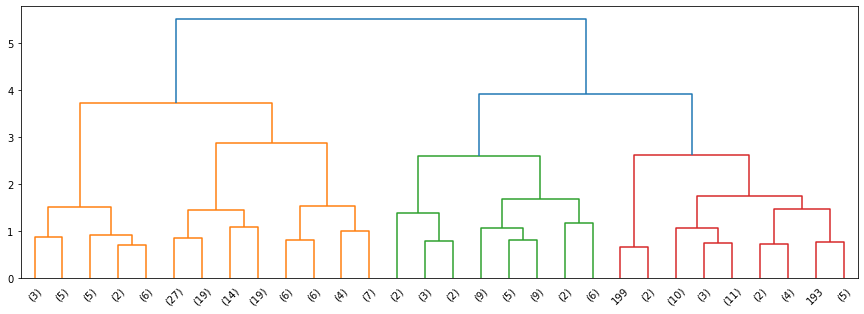

In [23]:
plt.figure(figsize=(15, 5))
mergings = linkage(cls, method='complete', metric='euclidean')
dendrogram(mergings, truncate_mode='lastp')
plt.show()

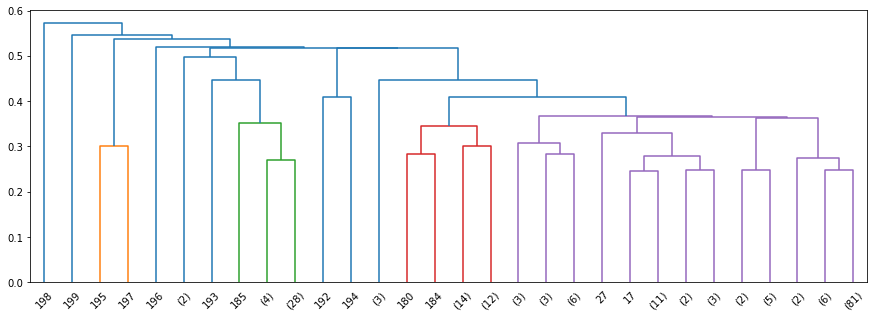

In [26]:
plt.figure(figsize=(15, 5))
mergings = linkage(cls, method='single', metric='euclidean')
dendrogram(mergings, truncate_mode='lastp')
plt.show()

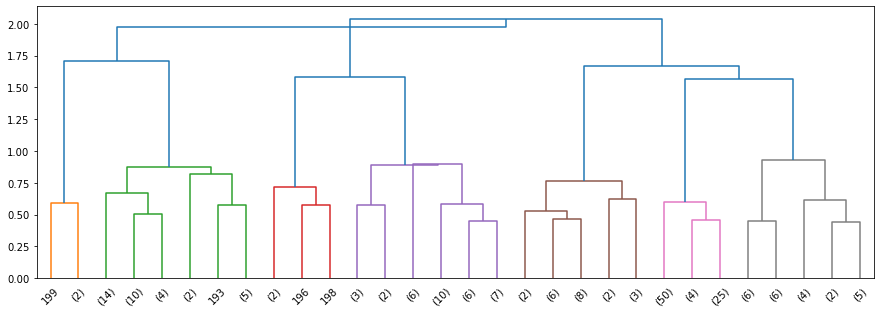

In [27]:
plt.figure(figsize=(15, 5))
mergings = linkage(cls, method='centroid', metric='euclidean')
dendrogram(mergings, truncate_mode='lastp')
plt.show()

In [40]:
mergings = linkage(cls, method='complete', metric='euclidean')
cluster_cut = pd.Series(cut_tree(mergings, n_clusters=5).reshape(-1,))

In [41]:
cluster_cut.value_counts()

2    79
3    39
4    38
0    23
1    21
dtype: int64

In [42]:
cl = cl.copy()
cl['cluster'] = cluster_cut

In [43]:
cl.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,0
1,15,81,1
2,16,6,0
3,16,77,1
4,17,40,0


In [50]:
cl_centroid = cl.groupby('cluster').agg(['mean'])

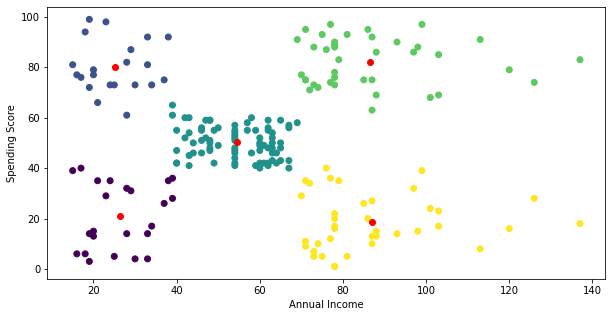

In [52]:
plt.figure(figsize=(10, 5))
plt.scatter(cl['Annual Income (k$)'], cl['Spending Score (1-100)'], c=cl['cluster'] )
plt.scatter(cl_centroid['Annual Income (k$)'], cl_centroid['Spending Score (1-100)'], c='r')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [58]:
pf = df.iloc[:,1:]
pf['Gender'] = pf['Gender'].replace({'Female':1, 'Male':0})
pf['cluster'] = cluster_cut

In [60]:
pf.groupby('cluster').agg('mean')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,,
0,0.608696,45.217391,26.304348,20.913043
1,0.571429,25.333333,25.095238,80.047619
2,0.594937,42.886076,54.417722,50.215190
3,0.538462,32.692308,86.538462,82.128205
4,0.473684,40.394737,87.000000,18.631579
